<img src="https://raw.githubusercontent.com/UCLAMAEThreads/MAE103/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 103 - Elementary Fluid Mechanics**
<hr />

# Streamlines
In this notebook, we will learn some basic ways to calculate and plot streamlines

### Set up the module

In [1]:
using MAE103

In [2]:
using Plots

Streamlines are curves in space that are everywhere tangent to the local velocity field.
They indicate the lines of flow in a steady fluid flow. If the flow is unsteady,
the lines represent a snapshot of the flow, but those lines will tend to change
with time.

The basic equations for streamlines come from the fact that the streamline must
be locally parallel to the velocity. This means that the local slope
of a streamline, $\mathrm{d}y/\mathrm{d}x$, must be equal to the ratio of the
velocity components, $v/u$, if we use Cartesian components for the velocity,
$\boldsymbol{V} = u \boldsymbol{i} + v \boldsymbol{j}$. Sometimes streamlines may
not be describable as $y$ as a function of $x$. For example, if a streamline is vertical,
then it can't be written this way. In that case, it would be better to write it as $x(y)$.
Or better yet, we could write it *parametrically*: e.g., $x(s)$ and $y(s)$, where $s$
is a parameter that increases along the streamline curve. So the more general way
to write the streamline equation that covers all cases is

$$\dfrac{\mathrm{d}x}{u} =  \dfrac{\mathrm{d}y}{u}$$

From this, we can choose either $x$ or $y$ as our independent variable, or another
one if necessary. We will see a few ways in this notebook.

# Example 1:
Suppose we are given the velocity field for a *stagnation flow*:
$u(x,y) = 10*x$, $v(x,y) = -10*y$
We seek the streamlines.

We first write these as a
$$\dfrac{\mathrm{d}y}{\mathrm{d}x} = \dfrac{v}{u} = \dfrac{-10y}{10x} = -\dfrac{y}{x}$$

Then, we separate variables and integrate:
$$\dfrac{\mathrm{d}y}{y} = -\dfrac{\mathrm{d}x}{x}$$

This leads to $\ln y = c - \ln x$, where $c$ is an arbitrary constant. Raising these
to a power of $\mathrm{e}$, we get

$$y = k/x$$

where $k$ is an arbitrary constant. Different choices for $k$ correspond to different streamlines.

Set up a function, which we'll call `ys`. We'll set a default value of `k`.

In [3]:
ys(x;k=1) = k/x

ys (generic function with 1 method)

Now plot several for different choices of `k`:

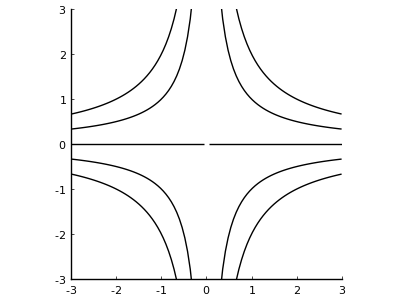

In [4]:
x = range(-3,3,length=101)
plot(xlim=(-3,3),ylim=(-3,3),ratio=1)
plot!(x,ys.(x;k=2),color=:black)
plot!(x,ys.(x;k=1),color=:black)
plot!(x,ys.(x;k=-1),color=:black)
plot!(x,ys.(x;k=-2),color=:black)
plot!(x,ys.(x;k=0),color=:black)

The $x$ axis is a streamline ($k = 0$). The $y$ axis is also a streamline, but
we can't get it because we assumed that $y$ was a function of $x$. If we repeat
the process by assuming that $x$ is a function of $y$, we get

$$x = k/y$$

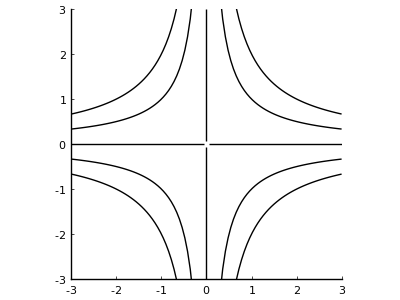

In [5]:
xs(y;k=1) = k/y
y = range(-3,3,length=101)
plot!(xs.(y;k=0),y,color=:black)

(Note that we swapped the order of arguments.)

# Example 2: A polar streamline plot
In this example, we wish to generate streamlines when the velocity is given
in polar coordinates: $\boldsymbol{V} = v_r \boldsymbol{e}_r + v_\theta \boldsymbol{e}_\theta$.
The velocity field is $v_r = 0$, $v_\theta = 10/r$. This velocity field has
only a circumferential component, which means that that flow only goes around in
circles; there is no radial flow.

We still apply the fact that the streamline is tangent to the velocity. However,
now, we don't use $\mathrm{d}x$ and $\mathrm{d}y$, but rather $\mathrm{d}r$
and $r\mathrm{d}\theta$:

$$\dfrac{\mathrm{d}r}{r\mathrm{d}\theta} = \dfrac{v_r}{v_\theta} = 0$$

In other words, $\mathrm{d}r/\mathrm{d}\theta = 0$ in this case, which simply
says that the streamlines are lines of constant $r$ --- they are circles!
That is, $r(\theta) = k$. Each choice of $k$ is a different streamline, and $k$
simply gives the radius of the streamline:

In [13]:
rs(θ,k,θ₀) = exp(k*(θ-θ₀))

rs (generic function with 2 methods)

Let's plot these streamlines. For plotting purposes, it is easiest to
convert the polar coordinates into Cartesian:

$$x = r\cos\theta,\qquad y = r\sin\theta$$

In [14]:
xs(θ,k,θ₀) = rs(θ,k,θ₀)*cos(θ)
ys(θ,k,θ₀) = rs(θ,k,θ₀)*sin(θ)

ys (generic function with 1 method)

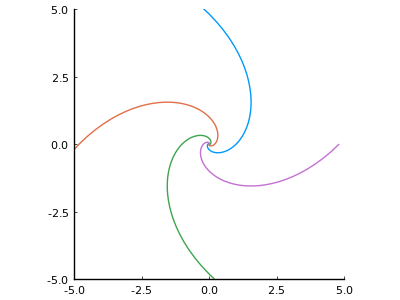

In [23]:
k = 1;
θ₀ = 0;
θ = range(-2π,2π,length=201)
plot(xlim=(-5,5),ylim=(-5,5),ratio=1)
plot!(xs.(θ,k,0),ys.(θ,k,0))
plot!(xs.(θ,k,π/2),ys.(θ,k,π/2))
plot!(xs.(θ,k,π),ys.(θ,k,π))
plot!(xs.(θ,k,3π/2),ys.(θ,k,3π/2))

In [24]:
t = range(0,)
T(x,t) = a*x+b - t
x(t) = u*t
plot(t,T.(x.(t),t))

T (generic function with 1 method)

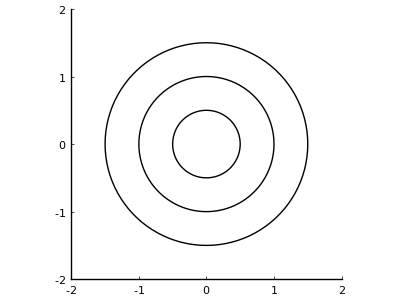

In [8]:
Θ = range(0,2π,length=201)
plot(xlim=(-2,2),ylim=(-2,2),ratio=1)
plot!(xs.(Θ,k=1),ys.(Θ,k=1),color=:black)
plot!(xs.(Θ,k=1.5),ys.(Θ,k=1.5),color=:black)
plot!(xs.(Θ,k=0.5),ys.(Θ,k=0.5),color=:black)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*